Отрисовывает графики функций активации (логистическую и гиперболический тангенс, ReLu) нейронных сетей для значений x от -2*любое число до 2*любое число с шагом 0,01:
Функция гиперболический тангенс и Логистическая функция

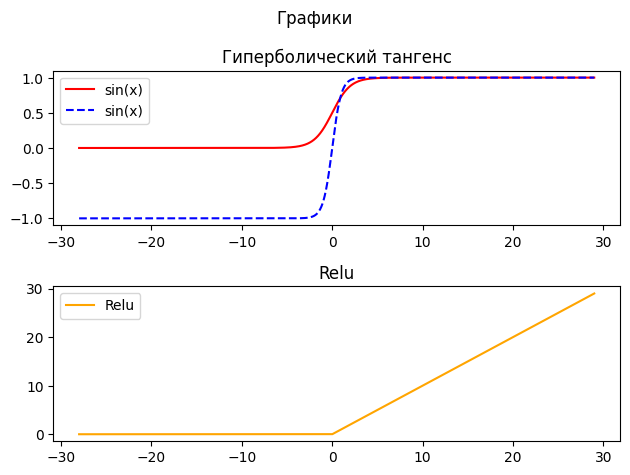

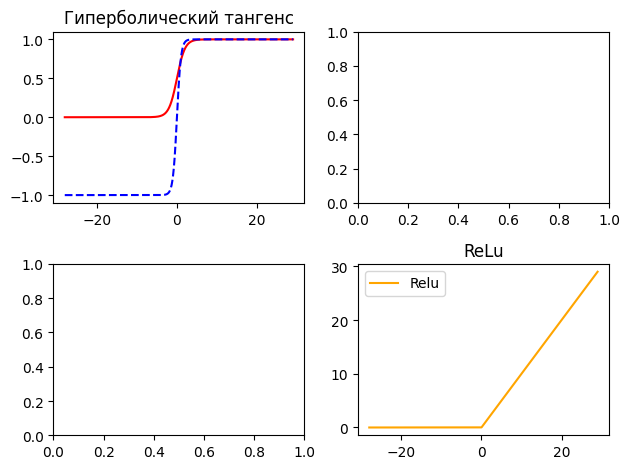

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# subplot
var = 14
x = np.arange(-2*var, var*2+1, 0.01)
y = np.sin(x)

# Первое полотно
fig, axis = plt.subplots(2)  # Создание полотна с двумя графиками
fig.suptitle('Графики')
# Создание гиперболического тангенса
axis[0].plot(x, 1/(1+np.exp(-x)), color='red', label='sin(x)') 
axis[0].plot(x, np.tanh(x), linestyle = '--', color='blue', label='sin(x)') 

axis[0].legend()
axis[0].set_title('Гиперболический тангенс')

# Функция вычисления СЛУ (ReLu)
def relu(x):
    if x < 0:
        return 0
    if x >= 0:
        return x

# Создание функции ReLu
axis[1].plot(x, list(map(lambda x: relu(x),x)), color='orange', label='Relu') 
axis[1].legend()
axis[1].set_title('Relu')

fig.tight_layout()

# Второе полотно (копируются графики из прошлого полотна и отрисовываются в других местах)
fig2, axis2 = plt.subplots(2,2)
line1 = axis[0].lines[0]
line2 = axis[0].lines[1]
axis2[0,0].set_title('Гиперболический тангенс')
axis2[0,0].plot(line1.get_xdata(), line1.get_ydata(), color=line1.get_color())
axis2[0,0].plot(line2.get_xdata(), line2.get_ydata(), color=line2.get_color(), linestyle=line2.get_linestyle())
line3 = axis[1].lines[0]
axis2[1,1].set_title('ReLu')
axis2[1,1].plot(line3.get_xdata(), line3.get_ydata(), color=line3.get_color(), label=line3.get_label())
axis2[1,1].legend()


fig2.tight_layout()

1.	Генерирует массив X из 100 элементов, значение элемента массива - случайное число в случайной области
2.	Генерирует массив Y из 100 элементов, значение элемента массива - случайное число в случайной области
3.	Отрисовывает множество точек с координатами X,Y 

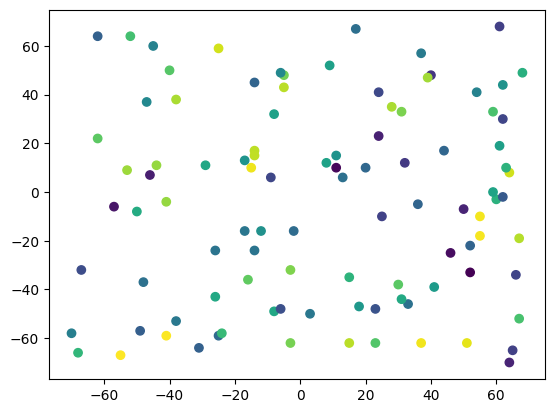

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# subplot
var = 14
size = 100 # Размер массива
colors = np.random.rand(100)

# Высисление множества точек
x = np.random.randint(-var*5, var*5, size)
y = np.random.randint(-var*5, var*5, size)

# Отрисовка множетсва точек
plt.scatter(x, y, c=colors)

Метод обратного распространения ошибки (backpropagation)

In [4]:
import datetime
import numpy as np
var = 14
now = datetime.datetime.now()

print(f'Дата: {now}')

inp_lr = [1, -1, 3, 2] # Входной слой
weights = [[0.5, -0.2, -0.2, 0.3], [-0.3, -0.1, 0.4, 0.5]] # Веса
out_lr = [1.0, 1.5] # Ожидаемые значения на выходном слое

# Функция активации
def act(x):
    return 1 / (1 + np.exp(-x))

# Вычисление сумм
def find_sum(w, il):
    s = []
    for i in range(len(w)):
        s_this = 0
        for j in range(len(w[i])):
            s_this += w[i][j] * il[j]
        s.append(s_this)
    return s

sum = find_sum(weights, inp_lr)

# Передаем суммы в функции активации
res = [act(sum[0]), act(sum[1])]

# Ошибка сети
err = 1/2*((out_lr[0]-res[0])**2+(out_lr[1]-res[1])**2)

def show_res(il, ol, w, s, r, er):
    print(f'Входной слой: {il}')
    print(f'Выходной слой: {ol}')
    print(f'Веса: {w}')
    for i in range(len(r)):
        print(f'Сумма нейрона V{i}: {s[i]} Значение нейрона V1: {r[i]}')
    print(f'Ошибка сети: {er}')

# Результаты программы
print('____________Старые результы________________')
show_res(inp_lr, out_lr, weights, sum, res, err)

for k in range(10):
    err_old = err
    d = [err*res[0]*(1-res[0]), err*res[1]*(1-res[1])] # Вычисление d5 и d6

    e = 0.1
    adw = 0.01
    eadw = e+adw

    # Вычисление значений, на которые будут изменены веса
    dW = np.zeros((len(weights), len(weights[0])))
    for i in range(len(weights)):
        for j in range(len(weights[i])):
            dW[i][j] = d[i]*inp_lr[j]*eadw
            #dW[i].append(d[i]*inp_lr[j]*eadw)


    # Вычисление новых весов
    #weights2 = weights
    for i in range(len(weights)):
        for j in range(len(weights[i])):
            weights[i][j] += dW[i][j]

    sum = find_sum(weights, inp_lr)
    # Передаем суммы в функции активации
    res = [act(sum[0]), act(sum[1])]
    # Ошибка сети
    err = 1/2*((out_lr[0]-res[0])**2+(out_lr[1]-res[1])**2)
    if err - err_old > 0.0001:
        break
    print(f'____________Новые результы_{k}_______________')
    show_res(inp_lr, out_lr, weights, sum, res, err)

Дата: 2023-05-10 07:52:00.300451
____________Старые результы________________
Входной слой: [1, -1, 3, 2]
Выходной слой: [1.0, 1.5]
Веса: [[0.5, -0.2, -0.2, 0.3], [-0.3, -0.1, 0.4, 0.5]]
Сумма нейрона V0: 0.6999999999999998 Значение нейрона V1: 0.668187772168166
Сумма нейрона V1: 2.0 Значение нейрона V1: 0.8807970779778823
Ошибка сети: 0.24675580658972682
____________Новые результы_0_______________
Входной слой: [1, -1, 3, 2]
Выходной слой: [1.0, 1.5]
Веса: [[0.5060179832768844, -0.2060179832768844, -0.1819460501693469, 0.31203596655376875], [-0.2971501445461711, -0.10284985545382887, 0.4085495663614866, 0.5056997109076578]]
Сумма нейрона V0: 0.7902697491532655 Значение нейрона V1: 0.6878892480219462
Сумма нейрона V1: 2.042747831807433 Значение нейрона V1: 0.8852127738998942
Ошибка сети: 0.23768822743808443
____________Новые результы_1_______________
Входной слой: [1, -1, 3, 2]
Выходной слой: [1.0, 1.5]
Веса: [[0.5116314041914598, -0.2116314041914598, -0.1651057874256207, 0.323262808382